In [1]:
import pandas as pd
import numpy as np
import psycopg2
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def connection_to_db():
    connection=psycopg2.connect(user='postgres',password='Naveen@2001',host='localhost',port=5432,database='emp_db')
    return connection

In [3]:
con=connection_to_db()

In [4]:
pd.read_sql_query("select * from employees.department",con)

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\820294068.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("select * from employees.department",con)


,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [5]:
def count_of_records():
    print("Number of records in department table are : ",pd.read_sql_query("select count(id) from employees.department",con)['count'][0])
    print("Number of records in department_employee table are : ",pd.read_sql_query("select count(employee_id) from employees.department_employee",con)['count'][0])
    print("Number of records in department_manager table are : ",pd.read_sql_query("select count(employee_id) from employees.department_manager",con)['count'][0])
    print("Number of records in employee table are : ",pd.read_sql_query("select count(id) from employees.employee",con)['count'][0])
    print("Number of records in salary table are : ",pd.read_sql_query("select count(employee_id)from employees.salary",con)['count'][0])
    print("Number of records in title table are : ",pd.read_sql_query("select count(employee_id) from employees.title",con)['count'][0])

In [6]:
count_of_records()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\928857144.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print("Number of records in department table are : ",pd.read_sql_query("select count(id) from employees.department",con)['count'][0])
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\928857144.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print("Number of records in department_employee table are : ",pd.read_sql_query("select count(employee_id) from employees.department_employee",con)['count'][0])
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\928857144.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI o

Number of records in department table are :  9
Number of records in department_employee table are :  331603
Number of records in department_manager table are :  24
Number of records in employee table are :  300024
Number of records in salary table are :  1141783
Number of records in title table are :  443308


C:\Users\navee\AppData\Local\Temp\ipykernel_20704\928857144.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  print("Number of records in title table are : ",pd.read_sql_query("select count(employee_id) from employees.title",con)['count'][0])


In [7]:
def load_python_script():
    df_dept = pd.read_sql_query("select * from employees.department",con)
    df_dept_emp = pd.read_sql_query("select * from employees.department_employee",con)
    df_dept_mgnr = pd.read_sql_query("select * from employees.department_manager",con)
    df_emp = pd.read_sql_query("select * from employees.employee",con)
    df_salary = pd.read_sql_query("select * from employees.salary",con)
    df_title = pd.read_sql_query("select * from employees.title",con)
    l=[df_dept,df_dept_emp,df_dept_mgnr,df_emp,df_salary,df_title ]
    return l
    

In [8]:
list_of_dataframes = load_python_script()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\4077213788.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dept = pd.read_sql_query("select * from employees.department",con)
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\4077213788.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dept_emp = pd.read_sql_query("select * from employees.department_employee",con)
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\4077213788.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dept_mgnr = pd.read_sql_query("sel

In [9]:
#Here we can load the entire data into dataframes
#If we cannot load the entire dataset then 
#1) read the dataset in chunks using chunksize parameter of pd.read_csv function
#This will return an iterator that you can loop over and perform operations on each chunk seperately
#2) Dask library is a parallel computing framework that can handle large datasets effectively.This creates
#distributed version of pandas dataframe that can be precessed in parallel accross multiple cores or clusters.
#3)Vaex library, high performance library that can process large datasets in memory. This creates a dataframe that is lazy 
#memory mapped version of a pandas df that can handle billions of rows without copying or loading them into memory.

In [10]:
#dff=pd.read_sql_query("select * from employees.salary limit %s offset %s"%(10,20),con)
#del dff

In [11]:
df_dept = list_of_dataframes[0]

In [12]:
df_dept.head()

,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [13]:
df_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         9 non-null      object
 1   dept_name  9 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


In [14]:
df_dept.nunique()

id           9
dept_name    9
dtype: int64

In [15]:
df_dept.groupby('id')['id'].value_counts()

id
d001    1
d002    1
d003    1
d004    1
d005    1
d006    1
d007    1
d008    1
d009    1
Name: count, dtype: int64

In [16]:
df_dept.groupby('dept_name')['dept_name'].value_counts()

dept_name
Customer Service      1
Development           1
Finance               1
Human Resources       1
Marketing             1
Production            1
Quality Management    1
Research              1
Sales                 1
Name: count, dtype: int64

In [17]:
#From above results we can say that the table department has no inconsistency

In [18]:
df_dept_emp=list_of_dataframes[1]

In [19]:
df_dept_emp.head()

,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [20]:
df_dept_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   employee_id    331603 non-null  int64 
 1   department_id  331603 non-null  object
 2   from_date      331603 non-null  object
 3   to_date        331603 non-null  object
dtypes: int64(1), object(3)
memory usage: 10.1+ MB


In [21]:
df_dept_emp.nunique()

employee_id      300024
department_id         9
from_date          6393
to_date            6085
dtype: int64

In [22]:
#we can see that the number of employee_id is not equal total number then check if the employee with repeating employee_id changed their's department or rehired after some time.
#To rectify this we can simply delete the duplicate rows if there are any
df_dept_emp.drop_duplicates

<bound method DataFrame.drop_duplicates of         employee_id department_id   from_date     to_date
0             10001          d005  1986-06-26  9999-01-01
1             10002          d007  1996-08-03  9999-01-01
2             10003          d004  1995-12-03  9999-01-01
3             10004          d004  1986-12-01  9999-01-01
4             10005          d003  1989-09-12  9999-01-01
...             ...           ...         ...         ...
331598       499995          d004  1997-06-02  9999-01-01
331599       499996          d004  1996-05-13  9999-01-01
331600       499997          d005  1987-08-30  9999-01-01
331601       499998          d002  1993-12-27  9999-01-01
331602       499999          d004  1997-11-30  9999-01-01

[331603 rows x 4 columns]>

In [23]:
# we can see that the number of records present after deleting duplicates are same as original.This says that there are
#no duplicate values present in dataset and the employee whose emp_id repeated are either changed their department or joined after break.

In [24]:
df_dept_emp.groupby('department_id')['department_id'].value_counts()

department_id
d001    20211
d002    17346
d003    17786
d004    73485
d005    85707
d006    20117
d007    52245
d008    21126
d009    23580
Name: count, dtype: int64

In [25]:
#from the above we can say that there is not any inconsistency present in the table department_employee

In [26]:
df_dept_mgnr=list_of_dataframes[2]

In [27]:
df_dept_mgnr.head()

,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21


In [28]:
df_dept_mgnr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   employee_id    24 non-null     int64 
 1   department_id  24 non-null     object
 2   from_date      24 non-null     object
 3   to_date        24 non-null     object
dtypes: int64(1), object(3)
memory usage: 900.0+ bytes


In [29]:
df_dept_mgnr.nunique()

employee_id      24
department_id     9
from_date        16
to_date          16
dtype: int64

In [30]:
df_emp=list_of_dataframes[3]

In [31]:
df_emp.head()

,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [32]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [33]:
df_emp.nunique()

id            300024
birth_date      4750
first_name      1275
last_name       1637
gender             2
hire_date       5434
dtype: int64

In [34]:
#From above we can say that the table employee also doesn't present any inconsistency

In [35]:
df_sal=list_of_dataframes[4]

In [36]:
df_sal.head()

,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [37]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141783 entries, 0 to 1141782
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   employee_id  1141783 non-null  int64 
 1   amount       1141783 non-null  int64 
 2   from_date    1141783 non-null  object
 3   to_date      1141783 non-null  object
dtypes: int64(2), object(2)
memory usage: 34.8+ MB


In [38]:
df_sal.nunique()

employee_id    120159
amount          78640
from_date        6392
to_date          6068
dtype: int64

In [39]:
df_tit=list_of_dataframes[5]

In [40]:
df_tit.head()

,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [41]:
df_tit.nunique()

employee_id    300024
title               7
from_date        6393
to_date          5888
dtype: int64

In [42]:
#from all above things we found that there is not any inconsistency present in database

In [43]:
from matplotlib import pyplot as plt

In [44]:
#Which department has the highest average salary of active employees ? Give some plots to show the avg salary department-wise.
def dept_avg_salary():
    query=""" select dept_name, avg(amount) from employees.salary s
             left join
             employees.department_employee de
             on s.employee_id=de.employee_id 
             left join
             employees.department
             on de.department_id=id
             where date_part('year',s.to_date)=9999 and date_part('year',de.to_date)=9999
             group by dept_name"""
    result=pd.read_sql_query(query,con)
    plt.bar(result['dept_name'],result['avg'])
    plt.xticks(rotation=90)
    plt.show()
    return result[result['avg'] == max(result['avg'])]

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\939789812.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


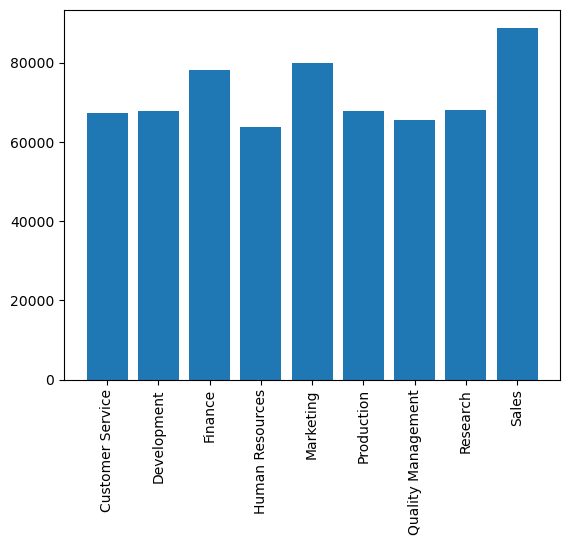

In [45]:
res_1=dept_avg_salary()

In [46]:
res_1

,dept_name,avg
8,Sales,88904.88619


In [47]:
# Which title has the highest avg salary? Give some plots to show the avg salary title-wise.
def tit_avg_salary():
    query="""select title, avg(amount) from employees.salary s 
             left join
             employees.title te
             on s.employee_id = te.employee_id
             where date_part('year',s.to_date) = 9999 and date_part('year',te.to_date)=9999
             group by title"""
    result=pd.read_sql_query(query,con)
    plt.bar(result['title'],result['avg'])
    plt.xticks(rotation=90)
    plt.show()
    return result[result['avg'] == max(result['avg'])]

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\3989141446.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


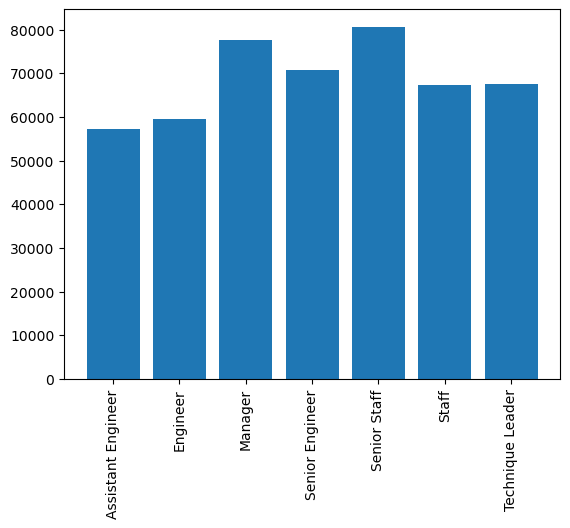

In [48]:
res_2=tit_avg_salary()

In [49]:
res_2

,title,avg
4,Senior Staff,80581.387555


In [50]:
# Distribution of salary across titles using distribution plots.
import seaborn as sns
def sal_dist_titles():
    get_titles_query = """	select distinct(title) from employees.title"""
    all_titles = pd.read_sql_query(get_titles_query, con)['title'].tolist()
    for i in all_titles:
        query_get_salary = """select s.amount from employees.title ti left join employees.salary s 
                 on s.employee_id = ti.employee_id
                 where date_part('year',ti.to_date)=9999 
                       and date_part('year',s.to_date)=9999 
                       and title = '%s'"""
        salary_df= pd.read_sql_query(query_get_salary %i, con)
        sns.distplot(salary_df, norm_hist = False, kde= False).set_title(i)
        plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2420380930.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_titles = pd.read_sql_query(get_titles_query, con)['title'].tolist()
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2420380930.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df= pd.read_sql_query(query_get_salary %i, con)
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2420380930.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to upd

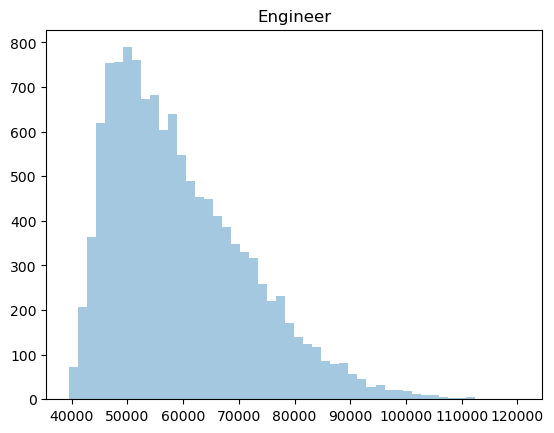

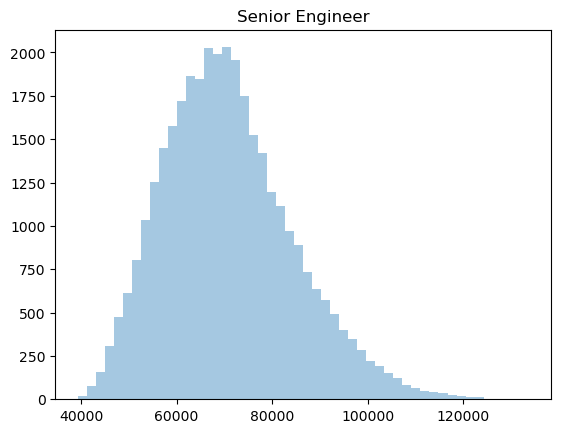

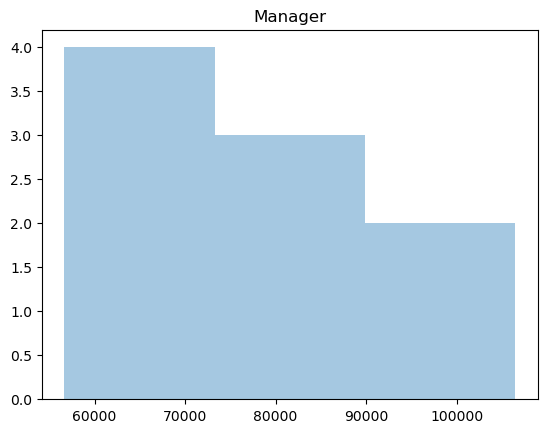

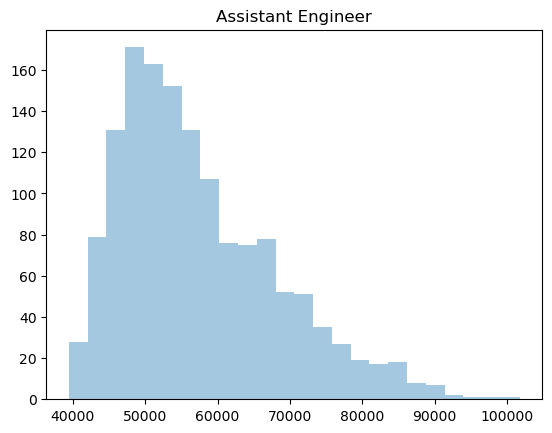

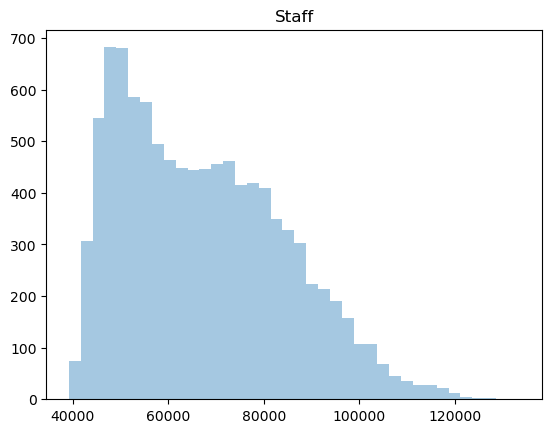

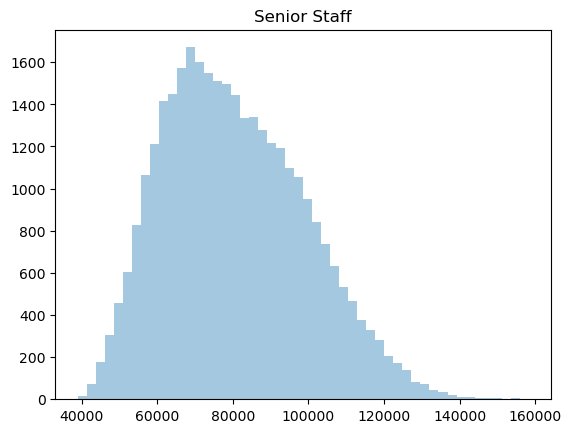

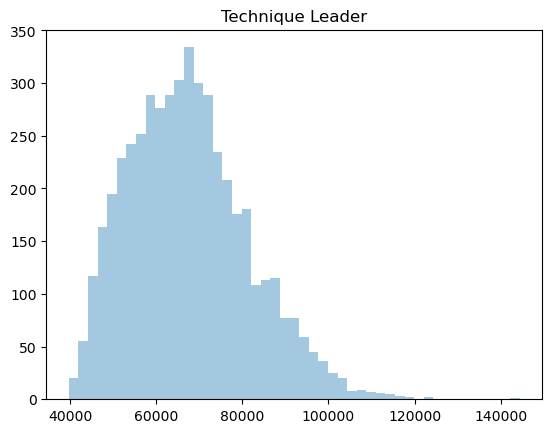

In [51]:
sal_dist_titles()

In [52]:
# Distribution of salary across titles using box and violin plots.
def sal_dist_t():
    query="""select amount, title from employees.salary s left join employees.title ti on s.employee_id=ti.employee_id where 
    date_part('year',s.to_date)=9999 and date_part('year',ti.to_date)=9999"""
    df=pd.read_sql_query(query,con)
#     sns.violinplot(data=df,x=df['amount'],y=df['title'])
    sns.boxplot(data=df,x=df['amount'],y=df['title'])
    plt.show()
    

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\3283155280.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query,con)


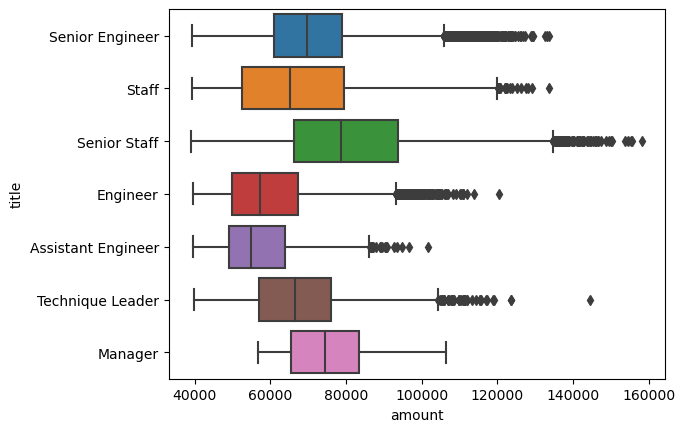

In [53]:
sal_dist_t()

In [54]:
#Distribution of salary across departments
def sal_dist_dept():
    query=""" select dept_name, amount from employees.salary s
             left join
             employees.department_employee de
             on s.employee_id=de.employee_id 
             left join
             employees.department
             on de.department_id=id
             where date_part('year',s.to_date)=9999 and date_part('year',de.to_date)=9999"""
    result=pd.read_sql_query(query,con)
    sns.violinplot(data=result,x=result['amount'], y=result['dept_name'])
    plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\3499399978.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


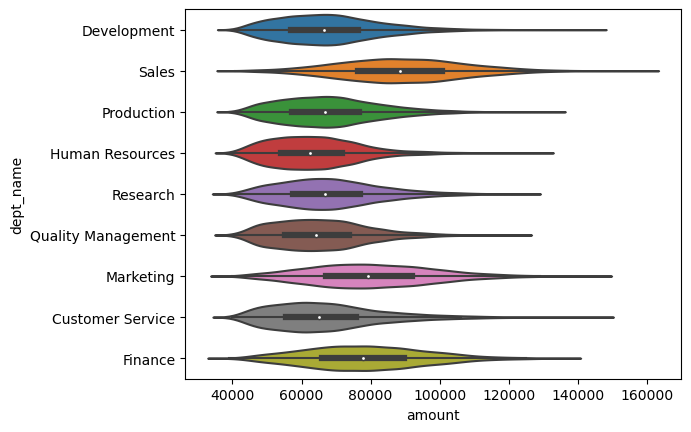

In [55]:
sal_dist_dept()

In [56]:
# How many active managers in each department. Is there any department with no manager?
def active_managers_dept():
    query="""select dept_name,count(employee_id) from employees.department d
             left join 
             employees.department_manager dm
             on d.id=dm.department_id
             where date_part('year',dm.to_date) = 9999
             group by dept_name"""
    q="select dept_name from employees.department"
    df=pd.read_sql_query(q,con)['dept_name'].tolist()
    result=pd.read_sql_query(query,con)
    print(result)
    if (len(result['dept_name'])==len(df)):
        return "Every department has managers"
    else:
        l=result['dept_name'].unique().tolist()
        a=[i for i in df if i not in l]
        print("Here is the list of departments that doesn't have manager\n",a)

In [57]:
active_managers_dept()

            dept_name  count
0    Customer Service      1
1         Development      1
2             Finance      1
3     Human Resources      1
4           Marketing      1
5          Production      1
6  Quality Management      1
7            Research      1
8               Sales      1


C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2977566771.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(q,con)['dept_name'].tolist()
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2977566771.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


'Every department has managers'

In [58]:
#Composition of titles department-wise. Appropriate plots.
def tit_dept():
    query="""select t.title, d.dept_name from employees.title t
    left join employees.department_employee de
    on de.employee_id=t.employee_id
    left join employees.department d
    on de.department_id=d.id where date_part('year',t.to_date) =9999 and
    date_part('year',de.to_date)=9999"""
    result=pd.read_sql_query(query,con)
    for i in result['dept_name'].unique():
        df=result[result['dept_name']==i]
        x_y=df.groupby('title')['title'].count()
        plt.pie(x_y,labels=x_y.index,autopct='%.2f')
        plt.title(i)
        plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\1657457096.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


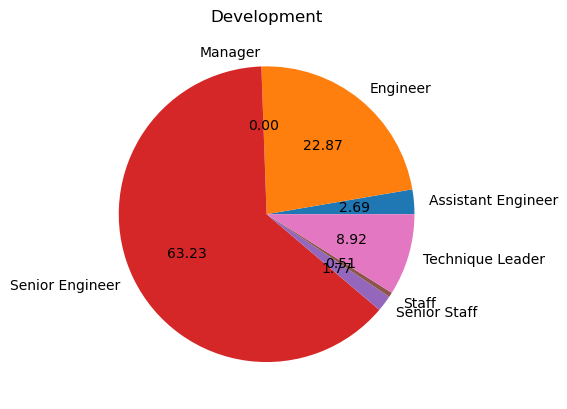

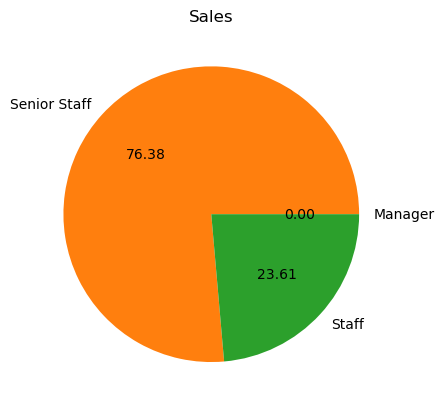

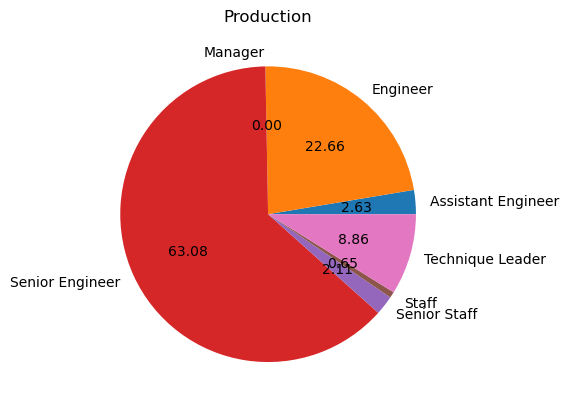

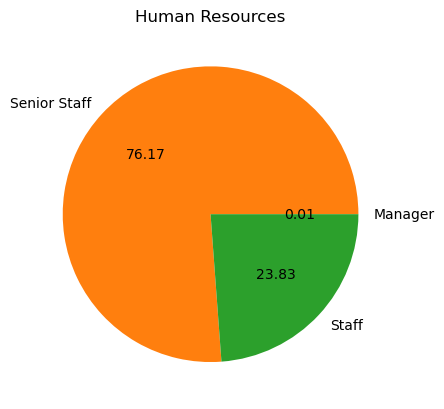

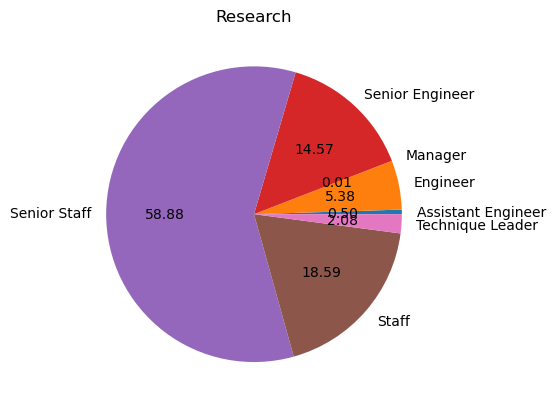

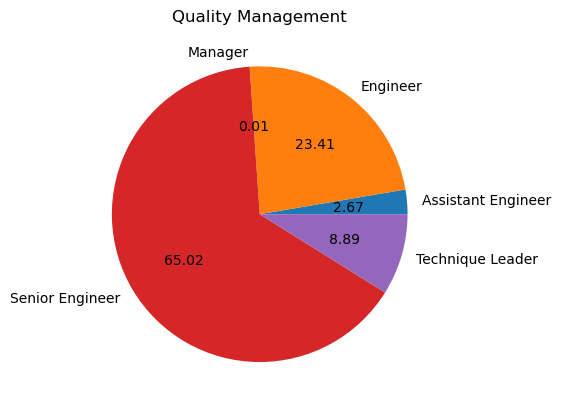

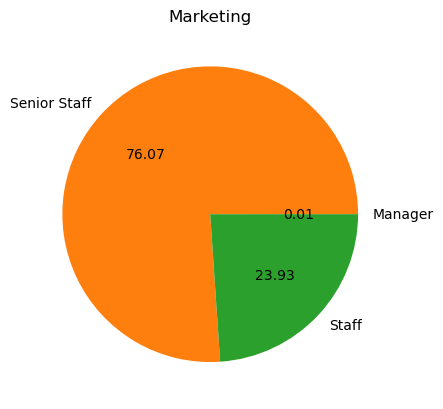

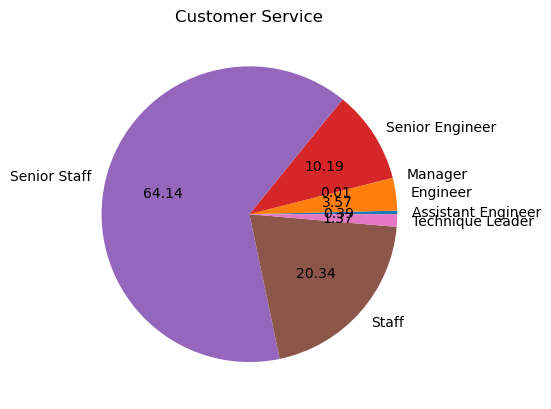

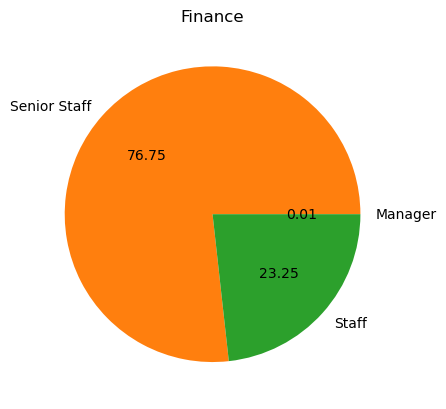

In [59]:
tit_dept()

In [60]:
#Composition of departments title-wise. Appropriate plots.
def dept_tit():
    query="""select t.title, d.dept_name from employees.title t
    left join employees.department_employee de
    on de.employee_id=t.employee_id
    left join employees.department d
    on de.department_id=d.id where date_part('year',t.to_date) =9999 and
    date_part('year',de.to_date)=9999"""
    result=pd.read_sql_query(query,con)
    for i in result['title'].unique():
        df=result[result['title']==i]
        x_y=df.groupby('dept_name')['title'].count()
        plt.pie(x_y,labels=x_y.index,autopct='%.2f')
        plt.title(i)
        plt.show()


C:\Users\navee\AppData\Local\Temp\ipykernel_20704\524946456.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


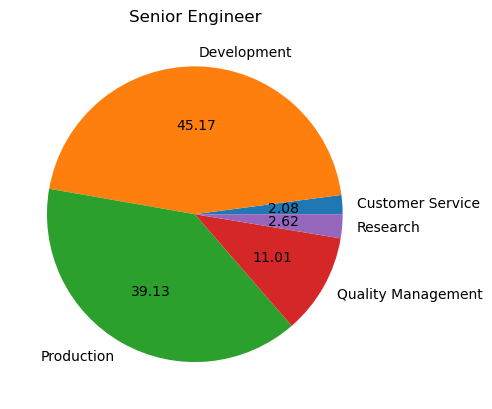

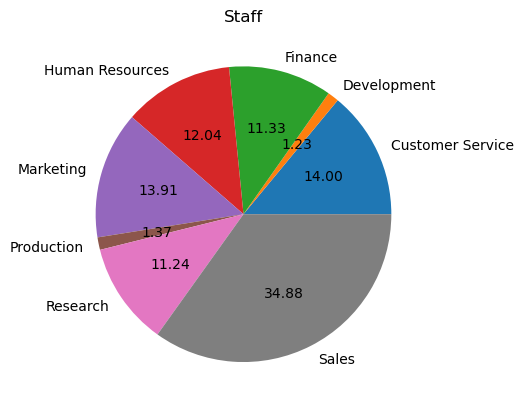

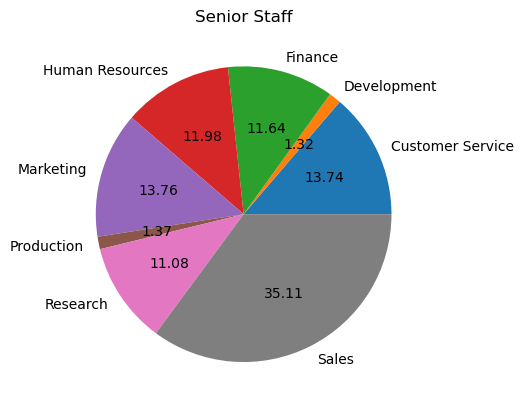

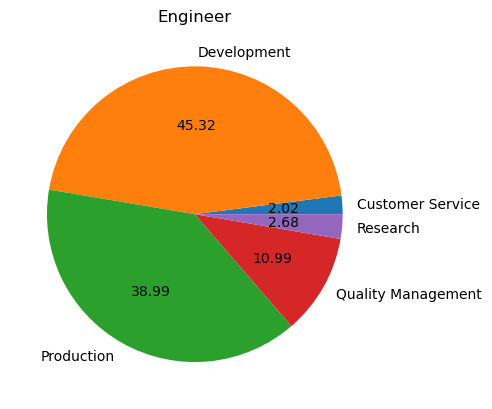

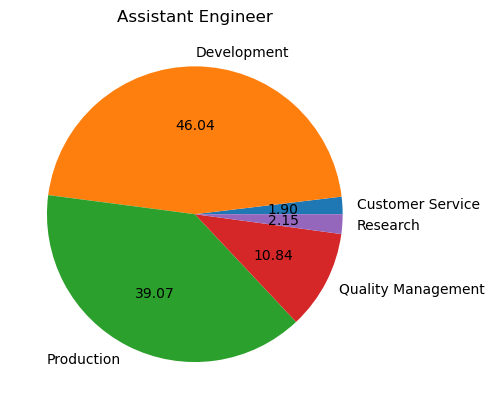

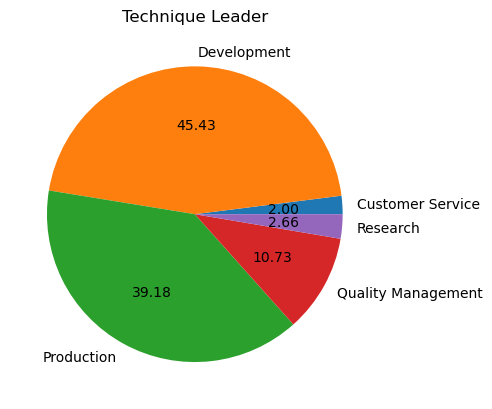

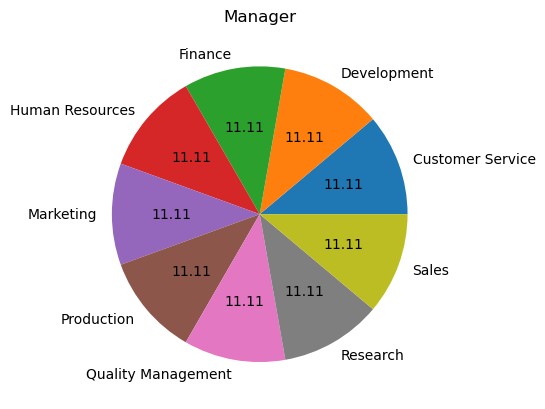

In [61]:
dept_tit()

In [62]:
#Salaries of active department managers. Which department's manager who is active earns the most?
def sal_mgnr():
    query="""select d.dept_name,s.amount from employees.salary s
    left join employees.department_manager dm
    on s.employee_id=dm.employee_id
    left join employees.department d
    on dm.department_id=d.id
    where date_part('year',dm.to_date)=9999 and
    date_part('year',s.to_date)=9999"""
    result=pd.read_sql_query(query,con)
    print(result)
    plt.bar(result['dept_name'],result['amount'])
    plt.xticks(rotation=90)
    plt.show()
    return result[result['amount']==max(result['amount'])]

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\3095037571.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


            dept_name  amount
0           Marketing  106491
1             Finance   83457
2     Human Resources   65400
3          Production   56654
4         Development   74510
5  Quality Management   72876
6               Sales  101987
7            Research   79393
8    Customer Service   58745


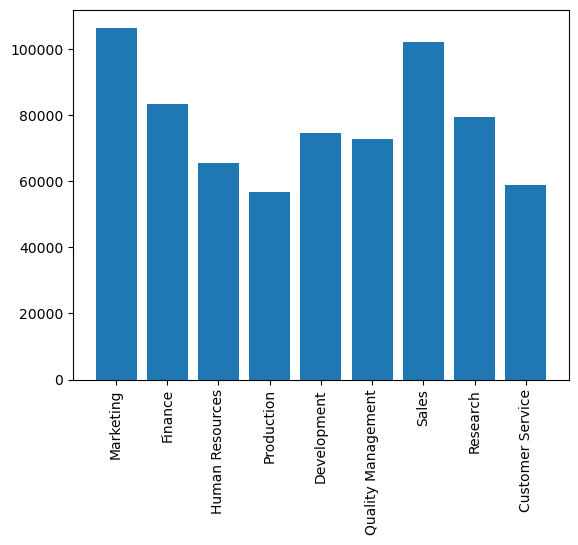

In [63]:
res_3=sal_mgnr()

In [64]:
res_3

,dept_name,amount
0,Marketing,106491


In [65]:
#What are the titles of active department managers? Are they managers only?
def tit_mgnr():
    query="""select t.title from employees.title t join 
    employees.department_manager dm
    on t.employee_id=dm.employee_id
    where date_part('year',t.to_date)=9999 and
    date_part('year',dm.to_date)=9999"""
    result=pd.read_sql_query(query,con)
    return result['title'].tolist()

In [66]:
res_4=tit_mgnr()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2891642607.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


In [67]:
res_4

['Manager',
 'Manager',
 'Manager',
 'Manager',
 'Manager',
 'Manager',
 'Manager',
 'Manager',
 'Manager']

In [68]:
# Past history of salaries of managers across department (yearly)
def sal_mgnr_y():
    query="""select s.employee_id, s.amount, s.from_date,s.to_date, d.dept_name
    from employees.salary s join employees.department_manager dm on
    s.employee_id=dm.employee_id join employees.department d on
    dm.department_id=d.id where s.from_date>=dm.from_date and s.to_date<=dm.to_date"""
    result=pd.read_sql_query(query,con)
    result['labels']=result['from_date'].apply(str)+" to "+result['to_date'].apply(str)
    dept=result['dept_name'].unique()
    emp_mgnr=result['employee_id'].unique()
    for i in dept:
        for j in emp_mgnr:
            df=result[(result['dept_name']==i) & (result['employee_id']==j)]
            if df.empty:
                continue
            else:
                plt.bar(df['labels'],df['amount'])
                plt.title(i+" "+str(j))
                plt.xticks(rotation=90)
                plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\762355544.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


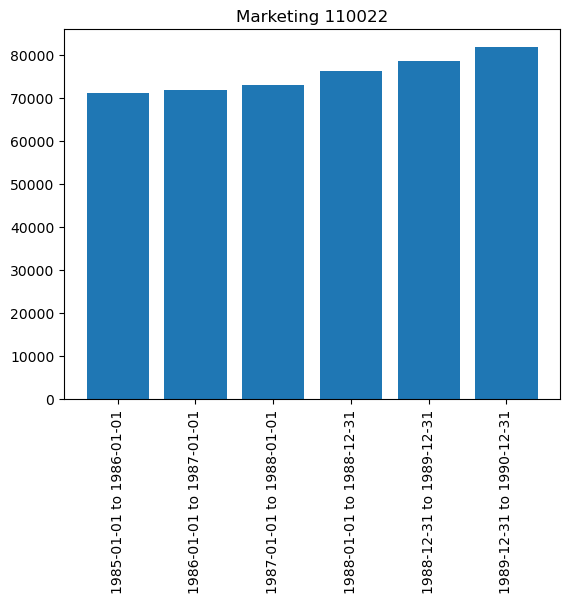

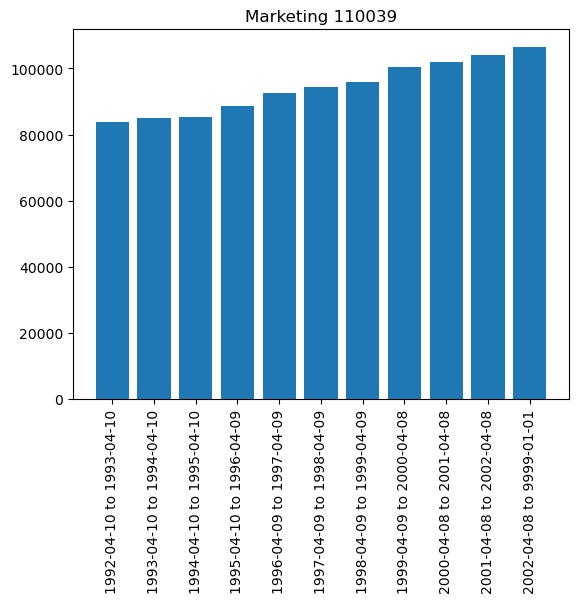

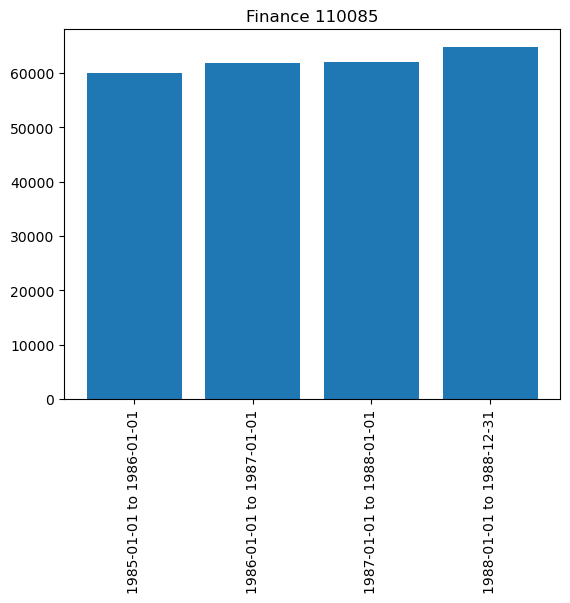

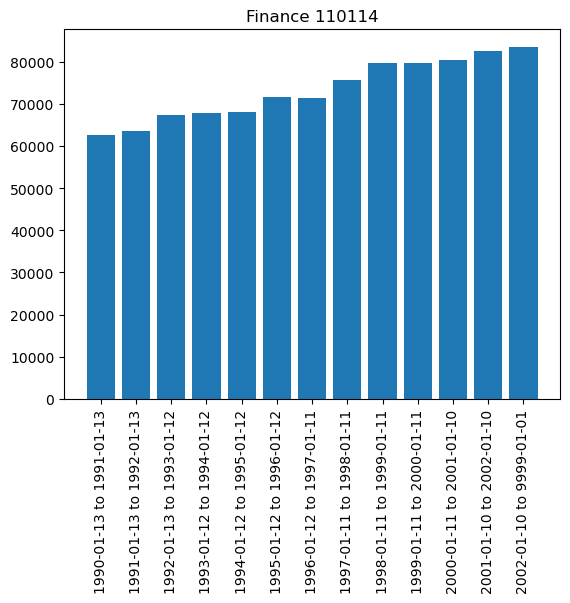

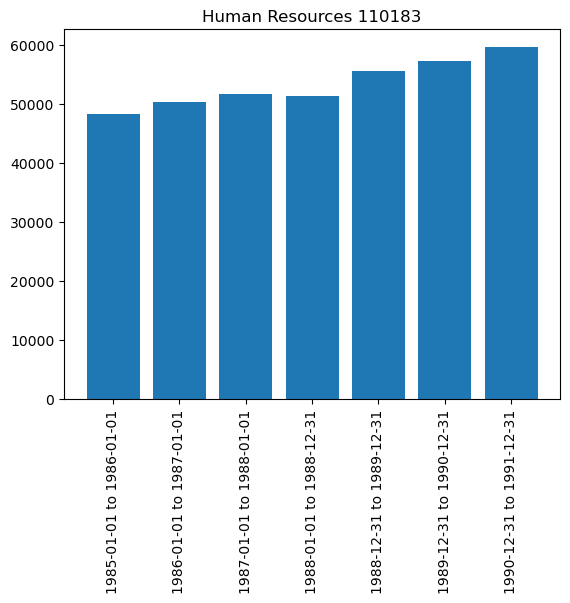

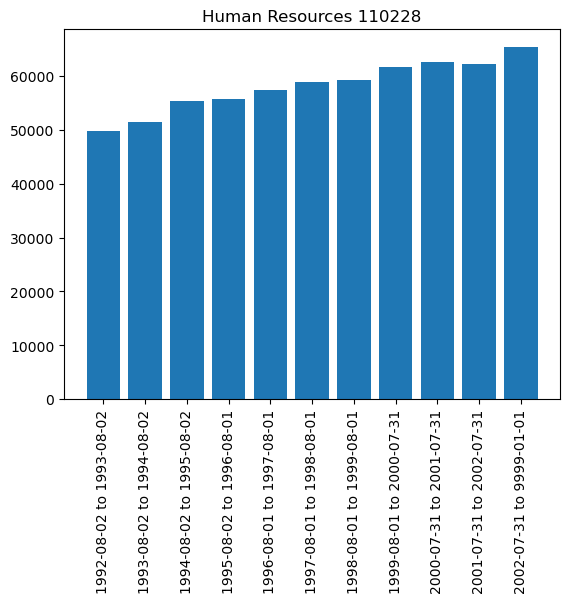

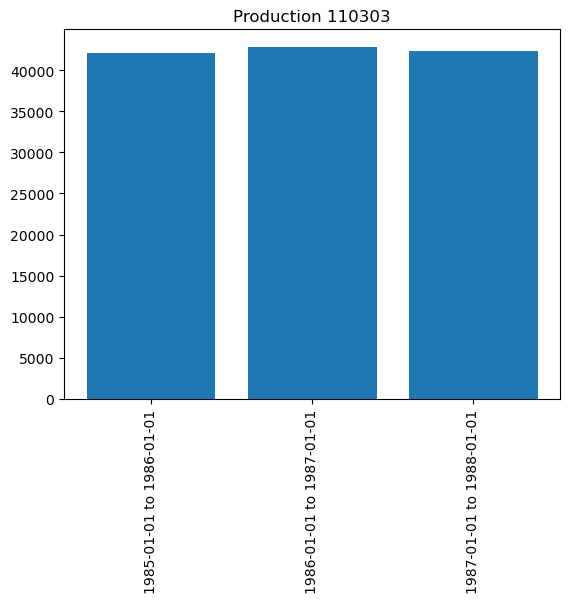

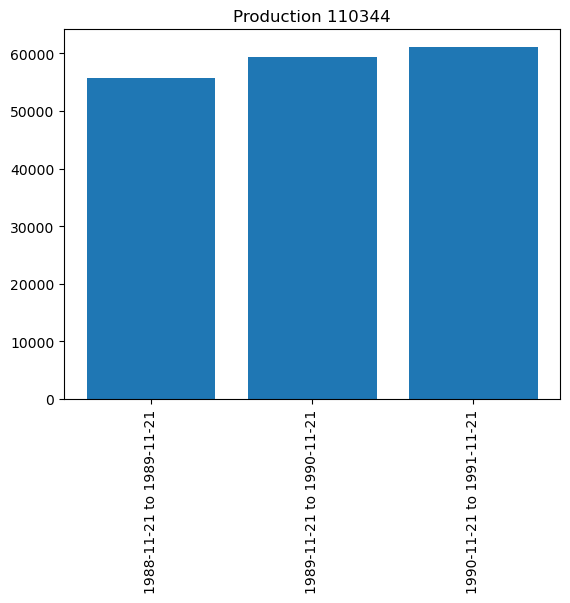

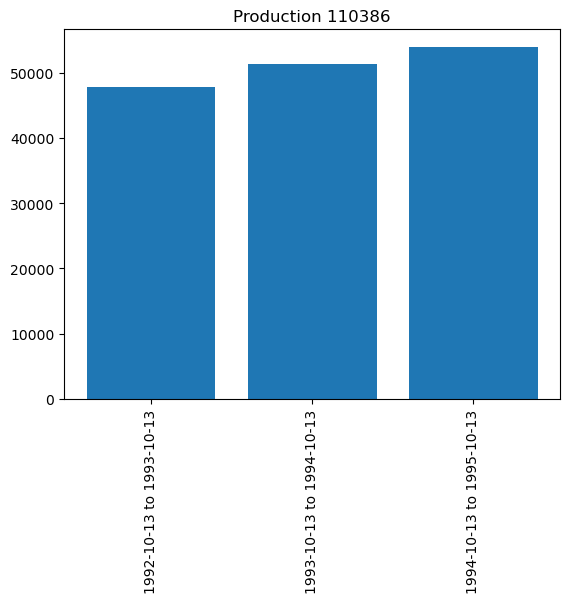

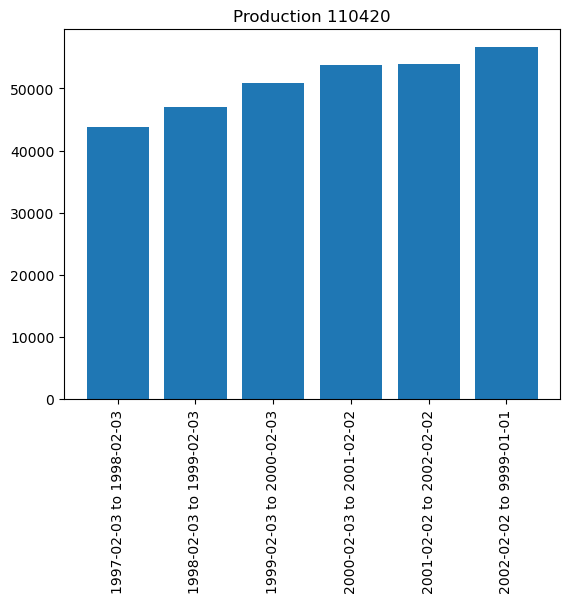

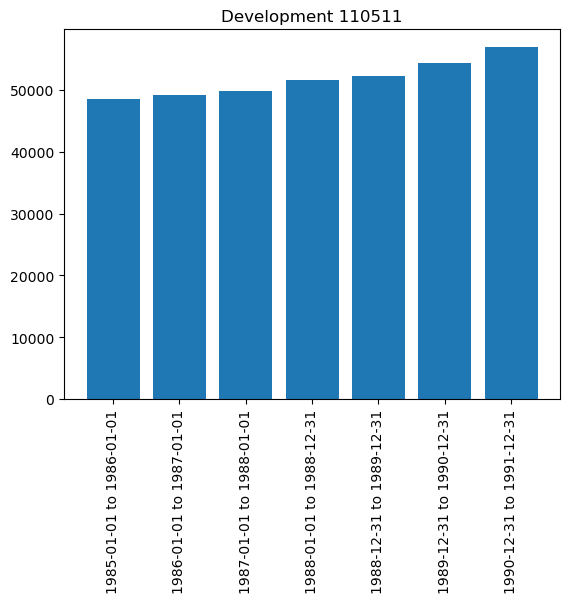

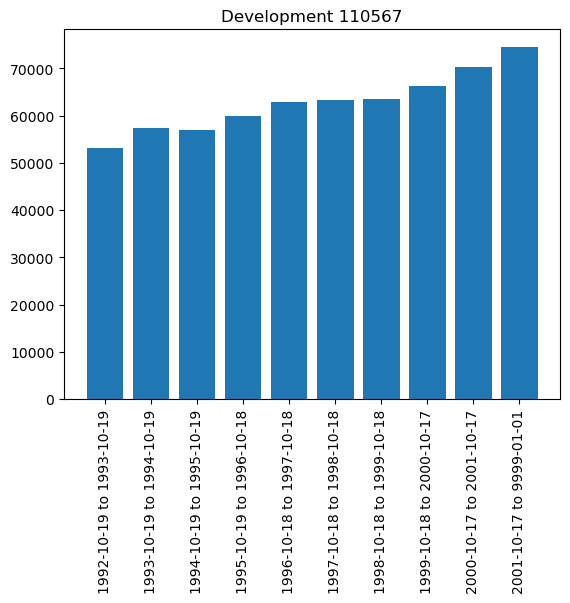

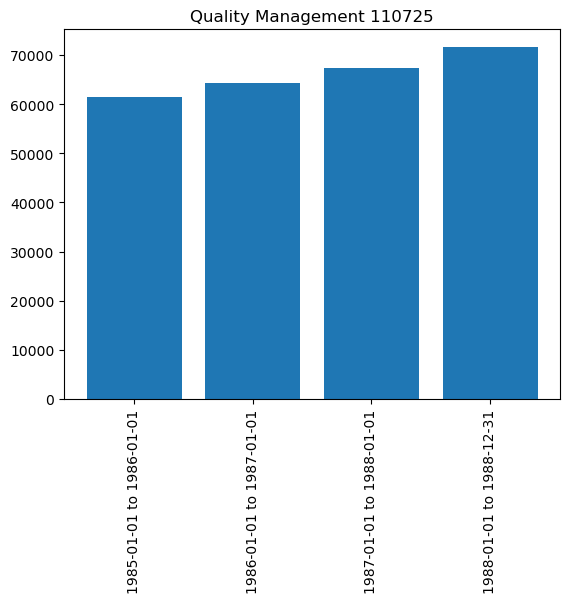

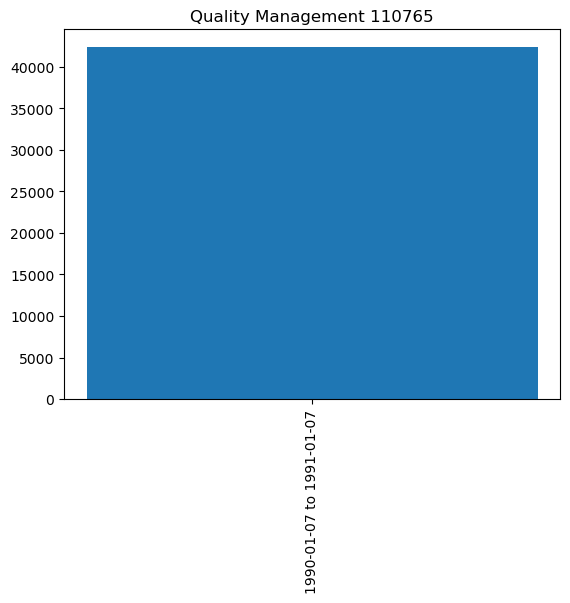

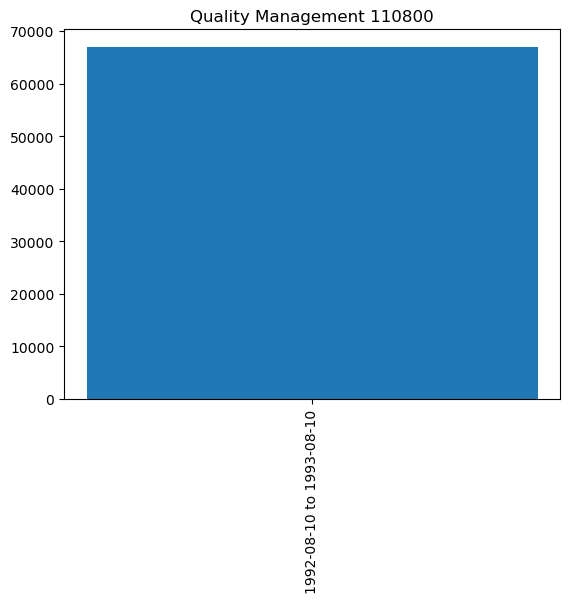

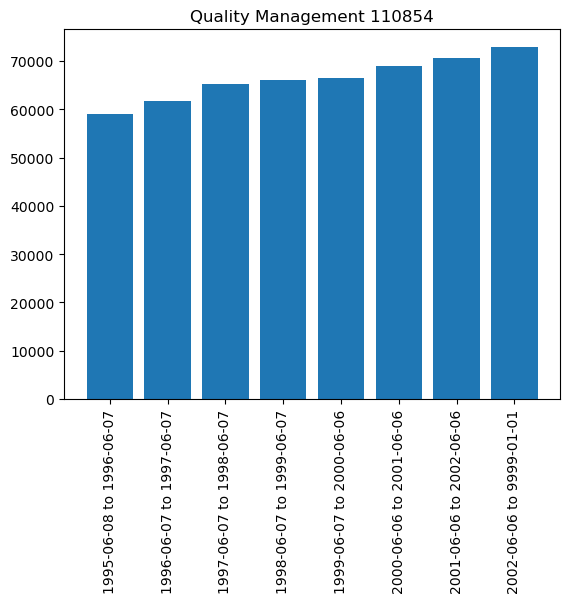

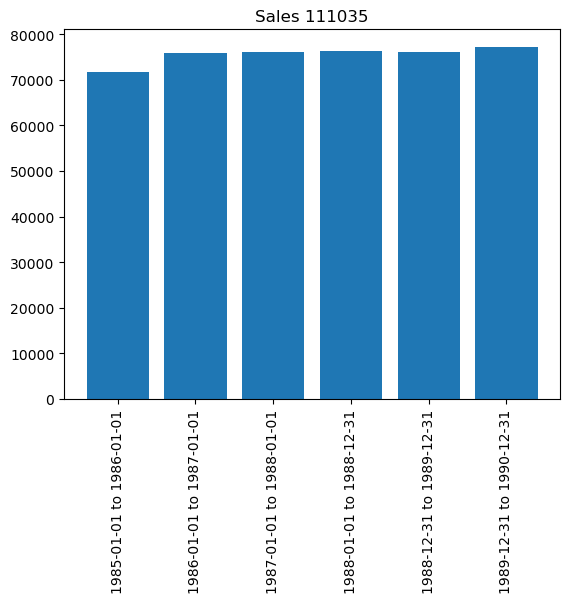

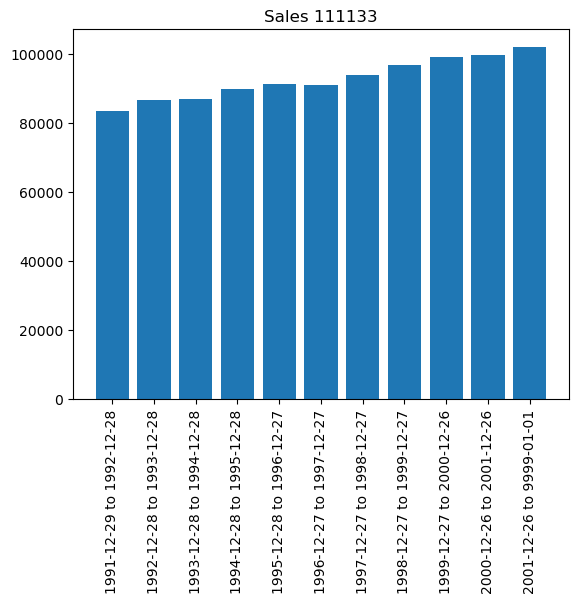

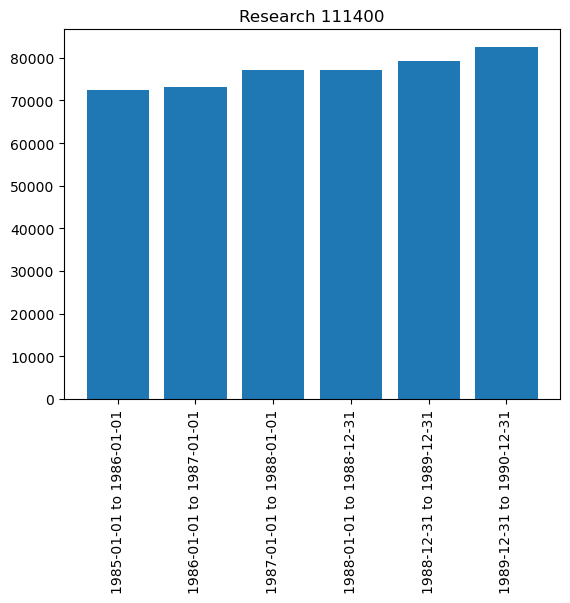

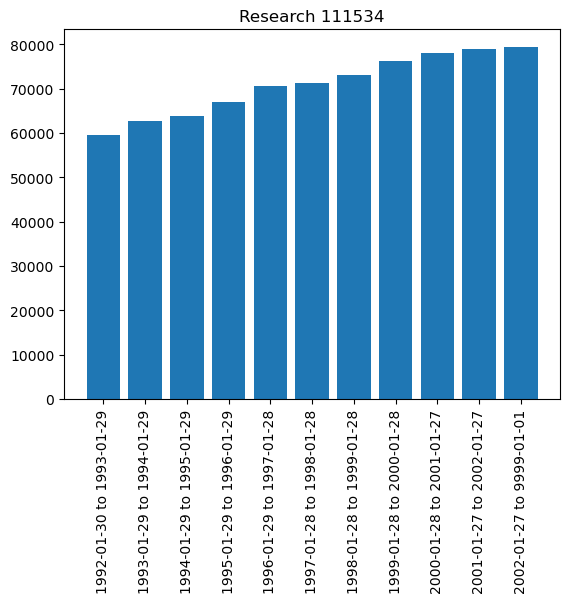

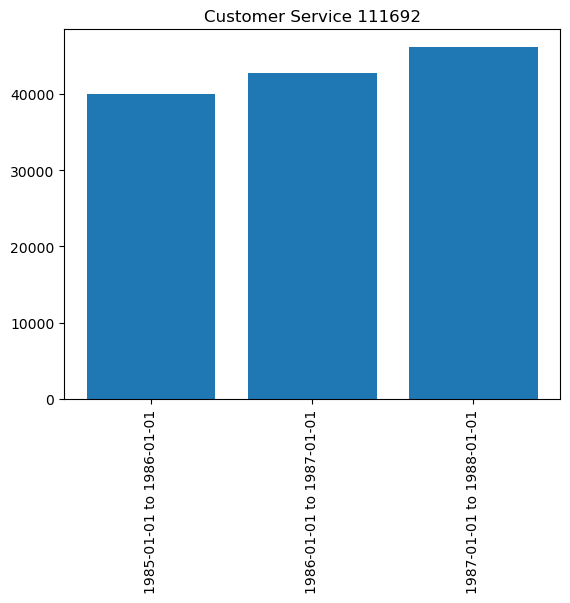

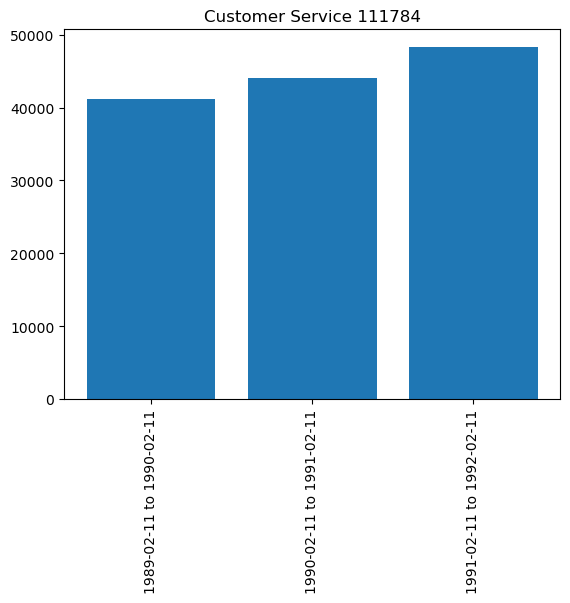

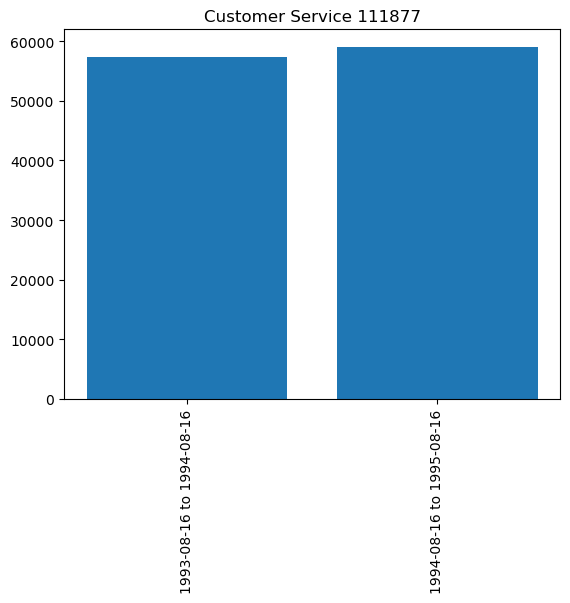

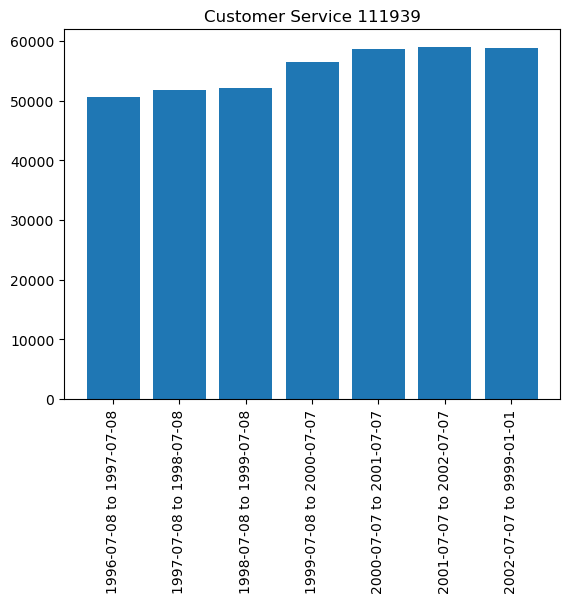

In [69]:
sal_mgnr_y()

In [70]:
#Distribution of salaries of active employees working for more than 10 years vs 4 years vs 1 year.
def dist_sal_act():
    query="""select s.amount, (case when date_part('year',de.to_date)-date_part('year',de.from_date)>=10 
    then '10+years'
    when date_part('year',de.to_date)-date_part('year',de.from_date)>=4
    then '4+years'
    when date_part('year',de.to_date)-date_part('year',de.from_date)>=1
    then '1+years'
    else 'Freshers' end) as exp from employees.salary s join employees.department_employee de
    on de.employee_id=s.employee_id where date_part('year',s.to_date)=9999 and date_part('year',de.to_date)-date_part('year',de.from_date)<=60"""
    result=pd.read_sql_query(query,con)
    sns.violinplot(x=result['amount'],y=result['exp'])

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\2642752266.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


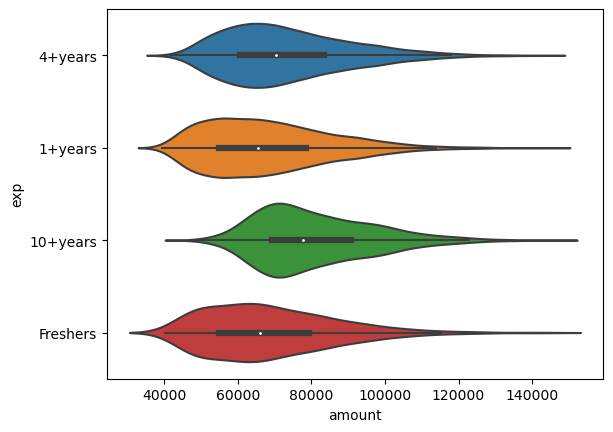

In [71]:
dist_sal_act()

In [72]:
# Average number of years employees work in the company before leaving (title wise).
def num_years_title():
    query="""select title,avg(date_part('year',de.to_date)-date_part('year',de.from_date)) from 
          employees.title t join employees.department_employee de on 
          de.employee_id=t.employee_id
          where date_part('year',de.to_date) != 9999 group by title"""
    result=pd.read_sql_query(query,con)
    plt.bar(result['title'],result['avg'])
    plt.xticks(rotation=45)
    plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\4265669396.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


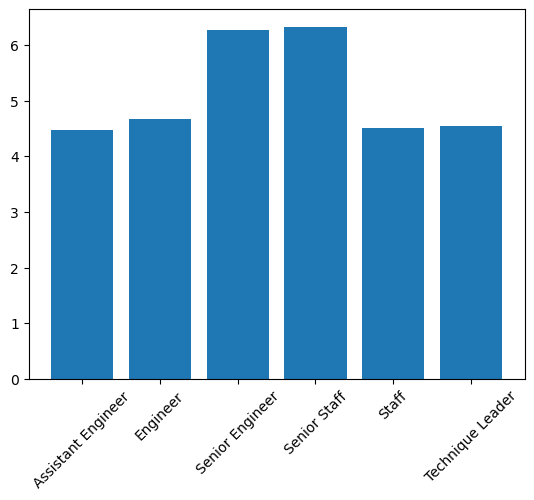

In [73]:
num_years_title()

In [74]:
#Average number of years employees work in the company before leaving (Dept wise).
def num_years_dept():
    query="""select d.dept_name,avg(date_part('year',de.to_date)-date_part('year',de.from_date)) from 
          employees.department d join employees.department_employee de on 
          d.id=de.department_id
          where date_part('year',de.to_date) != 9999 group by d.dept_name"""
    result=pd.read_sql_query(query,con)
    plt.bar(result['dept_name'],result['avg'])
    plt.xticks(rotation=45)
    plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\209696520.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result=pd.read_sql_query(query,con)


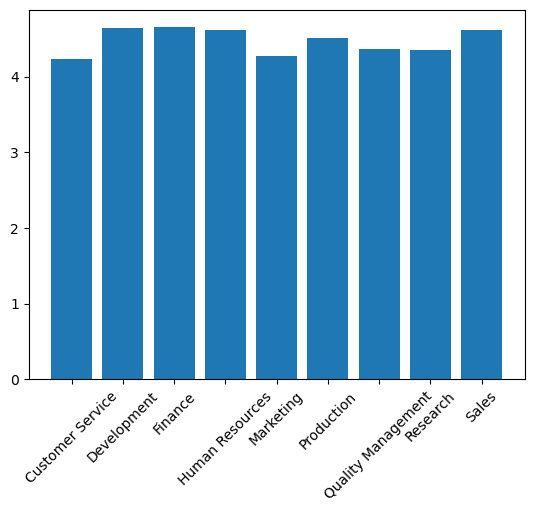

In [75]:
num_years_dept()

In [76]:
#Median annual salary increment department wise.
def median_inc():
    query="""select s.amount, date_part('year',s.from_date) as start, date_part('year',s.to_date) as end,d.dept_name from
    employees.salary s join employees.department_employee de on
    s.employee_id=de.employee_id join employees.department d
    on de.department_id=d.id where d.dept_name='%s'
    """
    query_1="select distinct(dept_name) from employees.department"
    r=pd.read_sql_query(query_1,con)['dept_name'].tolist()
    result={}
    for i in r:
        df=pd.read_sql_query(query %i,con)
#         df=df.groupby('start')['amount'].median().diff()
        df=df.groupby('start')['amount'].mean().diff()
        df.dropna(inplace=True)
        result[i]=np.median(df.values)
        plt.bar(df.index,df.values)
        plt.xticks(df.index,df.index,rotation=45)
        plt.show()
    return result

C:\Users\navee\AppData\Local\Temp\ipykernel_20704\3100112783.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  r=pd.read_sql_query(query_1,con)['dept_name'].tolist()
C:\Users\navee\AppData\Local\Temp\ipykernel_20704\3100112783.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query %i,con)


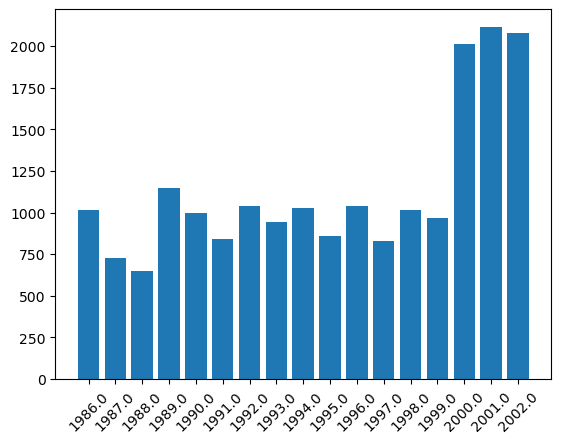

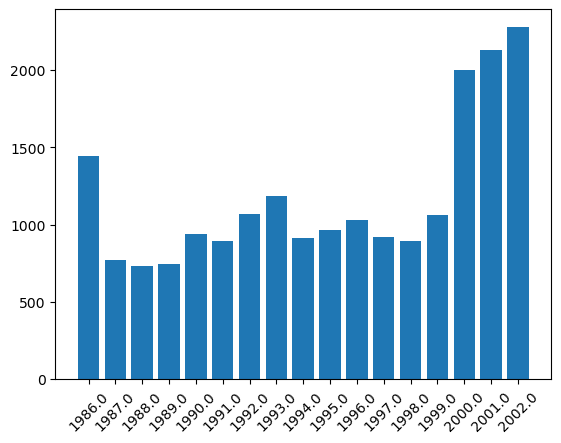

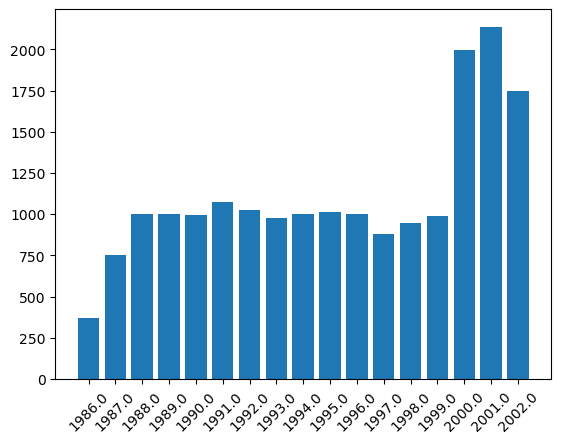

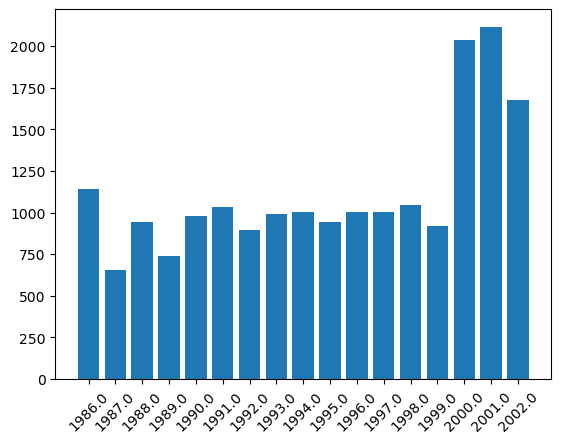

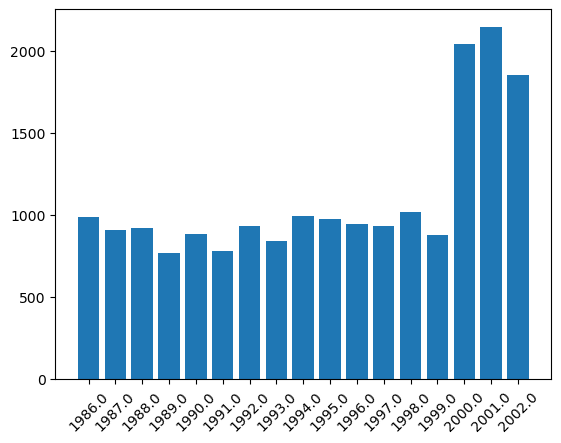

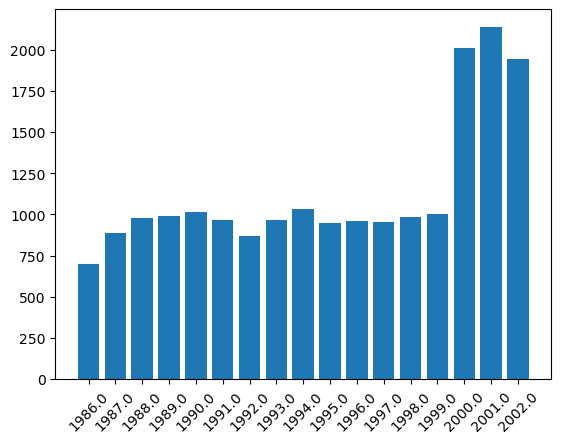

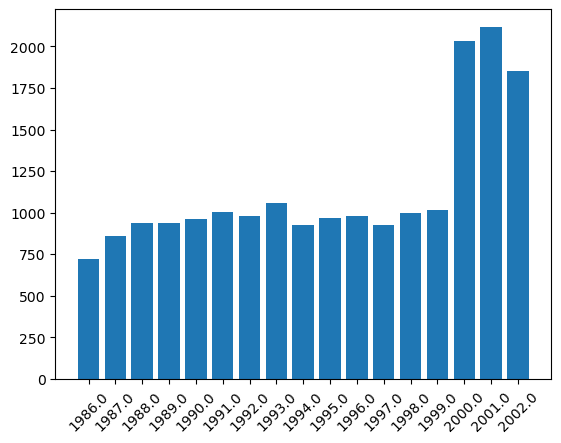

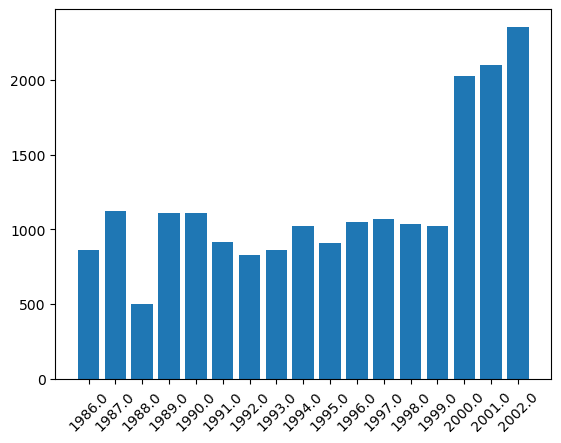

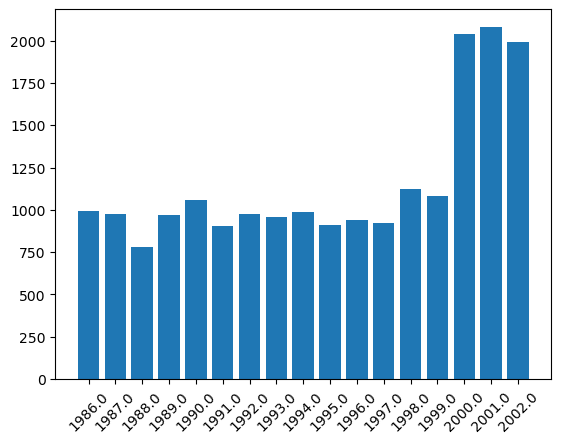

In [77]:
res_5 = median_inc()

In [78]:
res_5

{'Finance': 1016.38525674017,
 'Customer Service': 965.4212773404506,
 'Quality Management': 1000.4401934459311,
 'Sales': 1002.5438421414292,
 'Marketing': 931.8566599596816,
 'Development': 981.6860240095994,
 'Production': 977.1274022142316,
 'Research': 1037.4785071258666,
 'Human Resources': 977.4877220808994}